In [168]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [169]:
data = pd.read_csv('/content/quikr_car.csv')
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [170]:
data.shape

(892, 6)

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [172]:
data.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [173]:
data.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [174]:
data.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

### Data Preprocessing

In [175]:
data['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [176]:
data['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [177]:
data['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [178]:
data['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

In [179]:
data['name'].unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

In [180]:
data[data['company'] == "Hyundai"]

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
7,Hyundai Eon,Hyundai,2013,"1,90,000","25,000 kms",Petrol
12,Hyundai Elite i20 Magna 1.2,Hyundai,2014,"4,15,000","32,000 kms",Petrol
14,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
...,...,...,...,...,...,...
863,Hyundai Santro Xing,Hyundai,2004,"45,000","1,37,495 kms",Petrol
870,Hyundai Elite i20,Hyundai,2011,"2,90,000","40,000 kms",Petrol
871,Hyundai i20 Select Variant,Hyundai,2011,"2,90,000","40,000 kms",Petrol
874,Hyundai Elite i20,Hyundai,2018,"5,10,000","2,100 kms",Petrol


In [181]:
data[data['company'] == "Maruti"]

,name,company,year,Price,kms_driven,fuel_type
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
9,Maruti Suzuki Alto K10 VXi AMT,Maruti,2015,"2,50,000","60,000 kms",Petrol
11,Maruti Suzuki Stingray VXi,Maruti,2015,"3,15,000","30,000 kms",Petrol
19,Maruti Suzuki Alto 800,Maruti,2014,"1,60,000","35,550 kms",Petrol
22,Maruti Suzuki Alto 800 Vxi,Maruti,2015,"75,000","39,000 kms",Petrol
...,...,...,...,...,...,...
876,Maruti Suzuki Dzire,Maruti,2016,"4,50,000","2,500 kms",Diesel
879,Maruti Suzuki Alto LXi BS III,Maruti,2005,"95,000","65,000 kms",Petrol
880,Maruti Suzuki Swift Dzire Tour VDi,Maruti,2009,"2,50,000","51,000 kms",Diesel
882,Maruti Suzuki Alto 800 Select Variant,Maruti,2015,Ask For Price,"70,000 kms",Petrol


In [182]:
data['Price']

0             80,000
1           4,25,000
2      Ask For Price
3           3,25,000
4           5,75,000
           ...      
887         3,10,000
888         2,60,000
889         3,90,000
890         1,80,000
891         1,60,000
Name: Price, Length: 892, dtype: object

### Data Cleaning

**year has many non-year values**

In [183]:
data = data[data['year'].str.isnumeric()]
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


**year is in object.Change to interger**

In [184]:
data['year'] = data['year'].astype(int)

**Price has Ask for price**

In [185]:
data = data[data['Price'] != 'Ask For Price']
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


**Price has commas in its prices and is in object**

In [186]:
data['Price'] = data['Price'].str.replace(',', '').astype(int)

<ipython-input-186-c504d113154b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].str.replace(',', '').astype(int)


**kms_driven has object values with kms at last**

In [187]:
data['kms_driven'] = data['kms_driven'].str.split().str.get(0).str.replace(',','')

<ipython-input-187-f42aae2f33fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['kms_driven'] = data['kms_driven'].str.split().str.get(0).str.replace(',','')


In [188]:
data['kms_driven']

0       45000
1          40
3       28000
4       36000
6       41000
        ...  
886    132000
888     27000
889     40000
890    Petrol
891    Petrol
Name: kms_driven, Length: 819, dtype: object

**It has Nan values and two rows have 'Petrol' in them**

In [189]:
data = data[data['kms_driven'].str.isnumeric()]

In [190]:
data['kms_driven'] = data['kms_driven'].astype(int)

<ipython-input-190-630488d67b5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['kms_driven'] = data['kms_driven'].astype(int)


**fuel_type has nan values**

In [191]:
data = data[~data['fuel_type'].isna()]

In [192]:
data.shape

(816, 6)

**Name and Company column had spammed data...but with the previous cleaning, those rows got removed**

In [193]:
data['name'] = data['name'].str.split().str.slice(start=0, stop=3).str.join(' ')

**Resetting the index of the final cleaned data**

In [194]:
data = data.reset_index(drop=True)

### Cleaned Data

In [195]:
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


### Cleaning relationship of company with price

In [197]:
data['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [198]:
data['company'].value_counts()

Maruti        221
Hyundai       139
Mahindra       98
Tata           65
Honda          60
Toyota         36
Chevrolet      34
Renault        33
Ford           30
Volkswagen     19
Skoda          13
Audi           11
Mini            8
BMW             8
Datsun          7
Mitsubishi      6
Nissan          6
Mercedes        6
Fiat            4
Force           4
Hindustan       3
Jaguar          2
Land            1
Jeep            1
Volvo           1
Name: company, dtype: int64

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

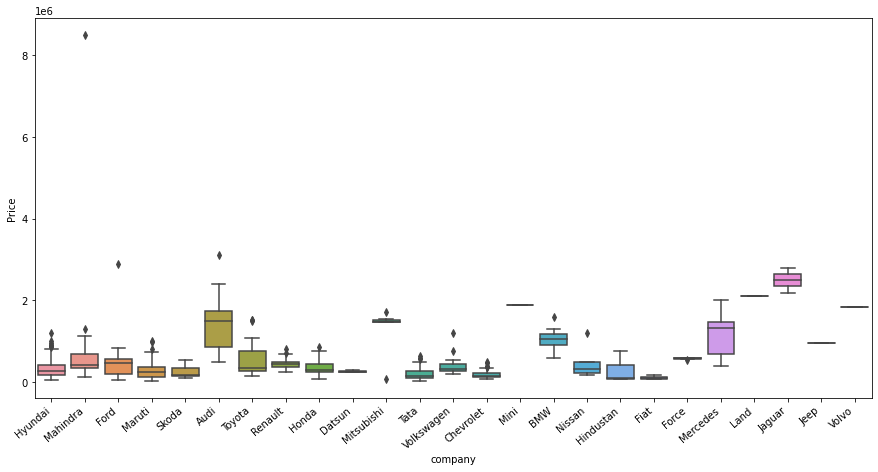

In [200]:
plt.subplots(figsize=(15, 7))
ax = sns.boxplot(x='company', y='Price', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha='right')
plt.show()

### Checking the relationship of Year with price

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 38.9% of the points cannot be placed; y

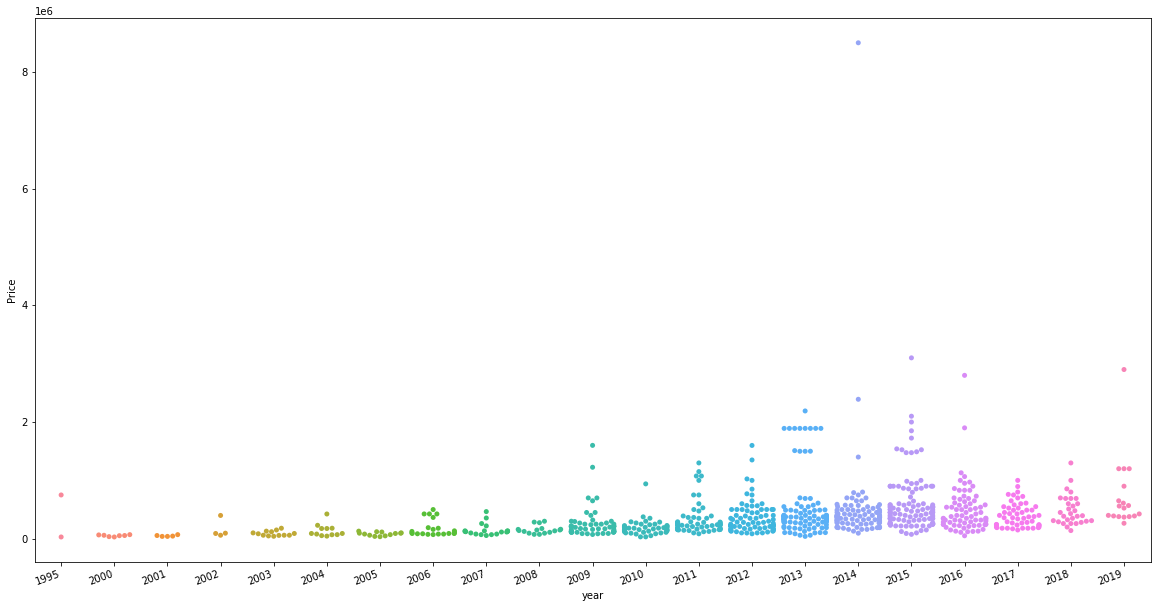

In [201]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=20,ha='right')
plt.show()

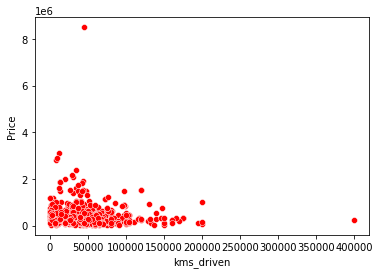

In [202]:
sns.scatterplot(x='kms_driven', y='Price', data=data, color='red')

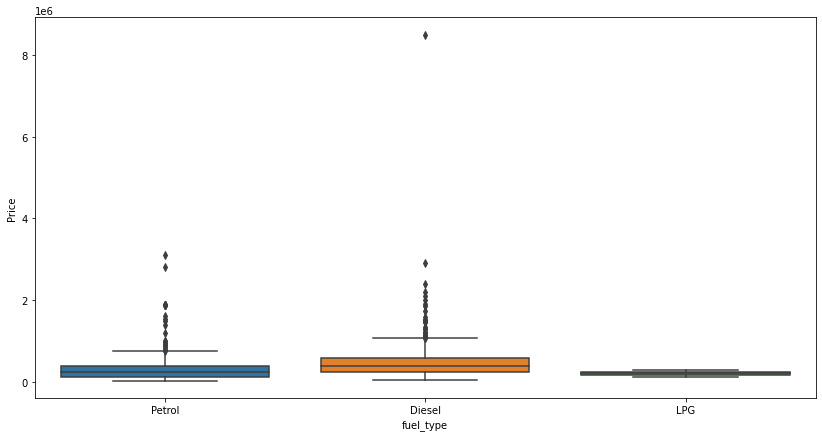

In [203]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='fuel_type', y='Price', data=data)

### Relationship of Price with FuelType, Year and Company mixed

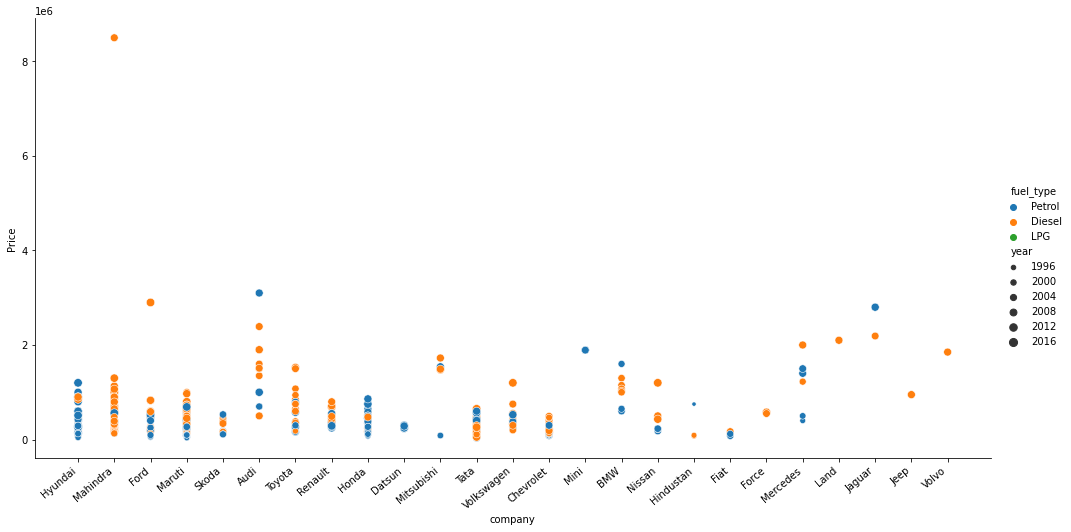

In [204]:

ax=sns.relplot(x='company',y='Price',data=data,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Splitting the Dataset into X and Y

In [205]:
X = data.drop('Price', axis=1)
y = data['Price']

In [206]:
X.head()

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel


In [207]:
y.shape

(816,)

### Applying the Train Test Split

In [208]:
from sklearn.model_selection import train_test_split

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20)

In [210]:
from sklearn.linear_model import LinearRegression

In [211]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [212]:
on = OneHotEncoder()
on.fit(X[['name', 'company', 'fuel_type']])

OneHotEncoder()

### Creating a column transformer to transform categorical columns

In [213]:
column_trans = make_column_transformer((OneHotEncoder(categories=on.categories_), ['name', 'company', 'fuel_type']),
                                      remainder = 'passthrough')

In [214]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet B...
       'Volkswagen Vento Konekt', 'Volvo S80 Summum'], dtype=object),
                                                           array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                           array(['Diesel', 'LPG', 'Petro

In [215]:
lr = LinearRegression()

### Making a pipeline

In [216]:
pipe = make_pipeline(column_trans, lr)

### Fitting the model

In [217]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [218]:
y_pred = pipe.predict(X_test)

### Checking the R2 score

In [219]:
r2_score(y_test, y_pred)

0.630110512039352

In [223]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [224]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
X['name']= label_encoder.fit_transform(X['name'])
  
X['name'].unique()

array([ 91, 118,  88,  40,  45,  79,  39, 148, 194, 162,  78, 131,   4,
         7, 129, 110, 165, 115, 163, 166, 239, 190, 199, 149, 182, 184,
        61, 152,  54,  56,  60,  32, 161, 174,  64, 209, 247,  26, 183,
       172, 193, 181, 130, 133, 125,  38,  57, 251, 108, 231,  97,   8,
       147, 235,  46,  17,  10, 142, 103,  96, 154,  55, 107, 153, 155,
       159, 236,  24, 176,  14,  41, 203,  52, 240, 243, 246, 245, 126,
       177, 187,  27,  35, 104,  16, 205,  81, 139,  43, 105,  84,  34,
       151, 167,  75, 132, 215, 221, 244, 191, 106, 144, 119, 117,  36,
       233,  63, 138,   1, 171, 114, 189, 200, 169,  30,  66,  29,  83,
       219,  21, 179, 157, 188,  73, 136,  53, 127,  67, 195, 212,  23,
         2,  77, 121, 101,  70,  93, 237, 116, 197, 226,  15,  94, 164,
       207, 252, 170, 158,  92,  65, 135,  58, 137, 180,  50, 238, 213,
       168, 206,  95,   9, 198,   5,  47, 123, 216,  62,  48, 232,  99,
        71, 228, 141, 224, 146,  68, 202,  59, 218, 111,  82,  8

In [225]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
X['company']= label_encoder.fit_transform(X['company'])
  
X['company'].unique()

array([ 9, 13,  6, 14, 20,  0, 22, 19,  8,  3, 17, 21, 23,  2, 16,  1, 18,
        7,  4,  5, 15, 12, 10, 11, 24])

In [226]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
X['fuel_type']= label_encoder.fit_transform(X['fuel_type'])
  
X['fuel_type'].unique()

array([2, 0, 1])

In [227]:
X

,name,company,year,kms_driven,fuel_type
0,91,9,2007,45000,2
1,118,13,2006,40,0
2,88,9,2014,28000,2
3,40,6,2014,36000,0
4,45,6,2012,41000,0
...,...,...,...,...,...
811,159,14,2011,50000,2
812,203,21,2009,30000,0
813,231,22,2009,132000,2
814,229,21,2018,27000,0


In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20)

In [231]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [232]:
# prediction on Training data
training_decision = regressor.predict(X_train)

In [233]:
y_pred = regressor.predict(X_test)

In [234]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
595,550000,599999.0
617,270000,140000.0
302,644999,584999.0
415,125000,110000.0
775,175000,250000.0
464,90000,85000.0
492,250000,315000.0
197,285000,210000.0
491,120000,200000.0
638,360000,190000.0


In [235]:
#Accuarcy for training
from sklearn.metrics import r2_score
score = r2_score(y_train, training_decision)
print("Accuracy:",score)

Accuracy: 0.9999081712504974


In [236]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("Accuracy:",score)

Accuracy: 0.8082165053940507


In [240]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [241]:
X

,name,company,year,kms_driven,fuel_type
0,91,9,2007,45000,2
1,118,13,2006,40,0
2,88,9,2014,28000,2
3,40,6,2014,36000,0
4,45,6,2012,41000,0
...,...,...,...,...,...
811,159,14,2011,50000,2
812,203,21,2009,30000,0
813,231,22,2009,132000,2
814,229,21,2018,27000,0


In [242]:
train = [] #to store acc values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred_train=model.predict(X_train) #make prediction on test set
    score_knn_train = r2_score(y_train, pred_train)
    train.append(score_knn_train) #store acc
    print('accuracy for k= ' , K , 'is:', score_knn_train)
print("The best accuracy is" ,max(train) ,"for k=", K)

accuracy for k=  1 is: 0.9998177450065258
accuracy for k=  2 is: 0.6415855668182888
accuracy for k=  3 is: 0.5355735794875118
accuracy for k=  4 is: 0.4670240016748938
accuracy for k=  5 is: 0.40199278519535486
accuracy for k=  6 is: 0.3535553069402202
accuracy for k=  7 is: 0.32443321082739074
accuracy for k=  8 is: 0.30537426830878855
accuracy for k=  9 is: 0.27109615388476094
accuracy for k=  10 is: 0.2509413427301257
accuracy for k=  11 is: 0.23815863040666074
accuracy for k=  12 is: 0.2183553874336438
accuracy for k=  13 is: 0.18499213186033747
accuracy for k=  14 is: 0.17019977079813375
accuracy for k=  15 is: 0.1639729527854471
accuracy for k=  16 is: 0.14159007871037277
accuracy for k=  17 is: 0.13461367280473036
accuracy for k=  18 is: 0.12570670644670823
accuracy for k=  19 is: 0.11597919255044098
accuracy for k=  20 is: 0.11215370577870898
The best accuracy is 0.9998177450065258 for k= 20
